# 11 - Probability and Simulation

In this notebook we look at some fun ways to do sampling and test some of the basics of probability just for giggles.

In [31]:
# Includes and Standard Magic...
### Standard Magic and startup initializers.

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd
# Load Stats
from scipy import stats
import seaborn as sns

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('fivethirtyeight')

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Show a ludicrus number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Supress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Probability and Code!

Note we're using [Numpy's probability functions](https://numpy.org/doc/stable/reference/random/index.html), you could also use [Python's](https://docs.python.org/3/library/random.html)

In [32]:
# Let's make a probability distribution:
outcomes = list(range(1,7))
outcomes

[1, 2, 3, 4, 5, 6]

In [35]:
#Simulate an outcome..
np.random.choice(outcomes)

6

In [36]:
# Do it a lot...
np.random.choice(outcomes, 20)

array([5, 5, 6, 5, 4, 6, 1, 1, 2, 2, 3, 2, 4, 3, 4, 5, 5, 6, 6, 2])

<AxesSubplot:ylabel='Frequency'>

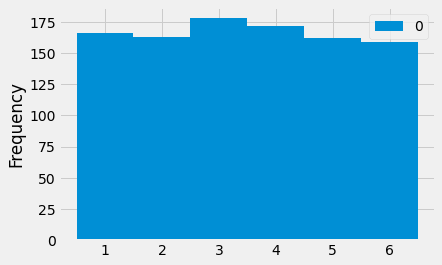

In [38]:
# Graph it!
results = pd.DataFrame(np.random.choice(outcomes, 1000))
results.plot.hist(bins=np.arange(0.5,7.5, 1))

<AxesSubplot:ylabel='Frequency'>

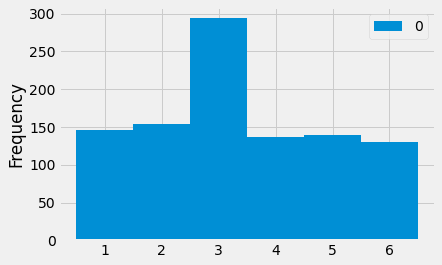

In [40]:
# Do it with a biased coin..
b = 1.0 / 7.0
b1 = 2.0 / 7.0
results = pd.DataFrame(np.random.choice(outcomes, 1000, p=[b, b, b1, b, b, b]))
results.plot.hist(bins=np.arange(0.5,7.5, 1))

In [41]:
# Do it for multiple events!
die1 = np.random.choice(outcomes, 10000)
die2 = np.random.choice(outcomes, 10000)
results = pd.DataFrame({'Die1': die1, 'Die2':die2})
results.head()

,Die1,Die2
0,3,3
1,6,2
2,2,1
3,6,5
4,2,3


<AxesSubplot:ylabel='Frequency'>

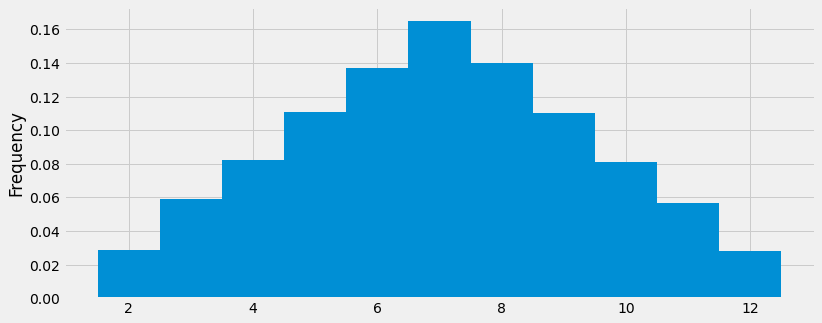

In [42]:
# Need to add them up...
plt.figure(figsize = (12,5))
results['sum'] = results["Die1"] + results["Die2"]
results['sum'].plot.hist(bins=np.arange(1.5, 13.5, 1), density=True)

In [44]:
# Default is with replacement but we can do without replacement..
people = ['Winona', 'Xanthippe', 'Yvonne', 'Zelda']
np.random.choice(people, 3, replace=False)

array(['Yvonne', 'Winona', 'Xanthippe'], dtype='<U9')

### One thing we may want to do in a stats model is ....

See if a particular distribution is the same as some known distribution. To do this we typically use the [Chi Squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) if we known the underlying distribution.

Here we know that rolling two dice and summing them **should** give us a normal distribution so we can use a more complex [normal test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html) from Pearson (of correlation coefficient fame) to check...

**Returns**

statistic : float or array
s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.

pvalue: float or array
A 2-sided chi squared probability for the hypothesis test.

In [45]:
# See if one die is really a uniform distribution.
#
# Note that we need: f_obsarray_like
#                    Observed frequencies in each category.
#                    f_exparray_like, optional
#Expected frequencies in each category. By default the categories are assumed to be equally likely.
#

from scipy import stats
chisq, p = stats.chisquare(results["Die1"].value_counts(), [1./6, 1./6, 1./6, 1./6, 1./6, 1./6])
print("ChiSq = {} and p = {}".format(chisq,p))

ChiSq = 99997289.00000001 and p = 0.0


In [47]:
# See if the sum is normal..

from scipy import stats
k2, p = stats.normaltest(results["sum"])
print("K2 = {} and p = {}".format(k2,p))

K2 = 401.32957035872255 and p = 7.118542533471176e-88


What could things like this be used for when building statistical models? [Hint!](http://data8.org/materials-sp18/lec/lec16PDF.pdf)

## Looking at Two Variables.

Let's roll two dice a bunch of times and see the resutls.


In [48]:
die1 = np.random.choice(outcomes, 100)
die2 = np.random.choice(outcomes, 100)
results = pd.DataFrame({'Die1': die1, 'Die2':die2})

In [49]:
counts = pd.crosstab(results['Die1'], results['Die2'])
counts

Die2,1,2,3,4,5,6
Die1,,,,,,
1,3,3,3,4,5,4
2,1,1,5,3,2,2
3,2,2,4,3,1,3
4,3,4,7,1,3,3
5,5,2,1,2,2,0
6,2,5,4,1,3,1


In [50]:
joint = pd.crosstab(results['Die1'], results['Die2'], normalize=True)
joint

Die2,1,2,3,4,5,6
Die1,,,,,,
1,0.03,0.03,0.03,0.04,0.05,0.04
2,0.01,0.01,0.05,0.03,0.02,0.02
3,0.02,0.02,0.04,0.03,0.01,0.03
4,0.03,0.04,0.07,0.01,0.03,0.03
5,0.05,0.02,0.01,0.02,0.02,0.00
6,0.02,0.05,0.04,0.01,0.03,0.01


In [51]:
# Now we can roll this up for either die to see it's distribution
joint.sum(axis=0)

Die2
1   0.16
2   0.17
3   0.24
4   0.14
5   0.16
6   0.13
dtype: float64

In [52]:
# Can also get marginals directly.
marginals = pd.crosstab(results['Die1'], results['Die2'], normalize=True, margins=True)
marginals

Die2,1,2,3,4,5,6,All
Die1,,,,,,,
1,0.03,0.03,0.03,0.04,0.05,0.04,0.22
2,0.01,0.01,0.05,0.03,0.02,0.02,0.14
3,0.02,0.02,0.04,0.03,0.01,0.03,0.15
4,0.03,0.04,0.07,0.01,0.03,0.03,0.21
5,0.05,0.02,0.01,0.02,0.02,0.00,0.12
6,0.02,0.05,0.04,0.01,0.03,0.01,0.16
All,0.16,0.17,0.24,0.14,0.16,0.13,1.00


In [53]:
# Finally, if we want conditional distributions we have to do a bit of work. Let's try to work out
# P(Die 1 is a 6 | Die 2 is a 5)

counts = pd.crosstab(results['Die1'], results['Die2'])
counts

Die2,1,2,3,4,5,6
Die1,,,,,,
1,3,3,3,4,5,4
2,1,1,5,3,2,2
3,2,2,4,3,1,3
4,3,4,7,1,3,3
5,5,2,1,2,2,0
6,2,5,4,1,3,1


In [54]:
# We need to get the (Die 2 is a 5 row) and then look at the distribution there..

counts[5] / counts[5].sum()

Die1
1   0.31
2   0.12
3   0.06
4   0.19
5   0.12
6   0.19
Name: 5, dtype: float64

## Using Simulation to Answer Probability Questions.

In CMPS 2170 we figured out closed form formulas for a set of mutually independent Bernoilli Trials.

* Bernoulli Trial: an experiment with two possible outcomes
* E.g., flip a coin results in two possible outcomes: head (𝐻) and tail (𝑇)
* Independent Bernoulli Trials: a sequence of Bernoulli trails that are mutually independent

* Example: What is the probability of the sequence HHHTT for a coin flip sequence with $p$ for H and $1-p$ for T?
  * $p^3(1-p)^2$.

Recall: The probability of exactly $k$ successes in $n$ independent Bernoulli trials, with probability of success $p$ and probability of failure $q = 1 − p$, is $C(n,k)p^kq^{n-k}$ where $C(n,k)$ is $n$ choose $k$.

In [55]:
# Setup a biased coin and flip it a bunch..
coin_results = np.random.choice(["Heads", "Tails"], 100, p=[0.75, 0.25])
coin_results

array(['Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads',
       'Tails', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads',
       'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Heads',
       'Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails',
       'Tails', 'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads',
       'Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Tails',
       'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads',
       'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Tai

## A More complex Question..

* What is the probability of getting 60 or more heads if I flip 100 coins?
* Approximation through simulation:
  1. Figure out how to do one experiment (i.e., flip 100 coins).
  2. Run the experiment a bunch of times.
  3. Find the fraction of times where number of heads >= 60.

In [56]:
# Flip 100 coins and count heads...
coin_results = np.random.choice(["Heads", "Tails"], 100, p=[0.75, 0.25])
print(coin_results == 'Heads')
print(np.count_nonzero(coin_results == 'Heads'))


[False  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True False  True  True False False
  True  True  True  True  True False  True  True  True  True  True False
 False  True False False  True  True  True  True  True  True  True  True
  True  True  True False  True  True False  True  True False False False
 False  True  True  True False  True  True  True  True False  True  True
  True  True  True False  True False  True  True  True False  True  True
  True False  True  True  True  True  True  True  True  True False False
  True  True  True  True]
76


In [57]:
# Wrap it up and do it a bunch...
# Note we're using Numpy here for broadcasting -- numpy arrays are imuteable so 
# it's a tad more akaward in places..
n_reps = 10000

def exp():
    coin_results = np.random.choice(["Heads", "Tails"], 100, p=[0.50, 0.50])
    return np.count_nonzero(coin_results == 'Heads')

head_counts = np.array([])
for i in range(n_reps):
    head_counts = np.append(head_counts, exp())

In [58]:
# Figure it out...
print(np.count_nonzero(head_counts >= 60))
print(np.count_nonzero(head_counts >= 60) / n_reps)

258
0.0258


If we work out the math we need at least 60 H so we have to add up quite a few things...
$\sum^{100}_{k=60} C(100, k)p^kq^n-k$

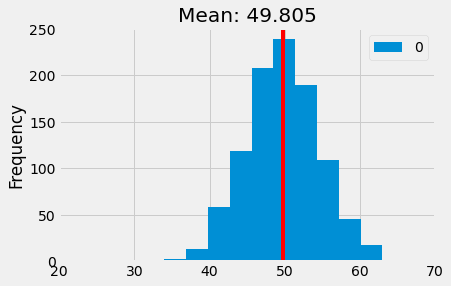

In [59]:
# Using simiulation we can also look at the trials
n_reps = 1000

head_counts = np.array([])
for i in range(n_reps):
    head_counts = np.append(head_counts, exp())

results = pd.DataFrame(head_counts)
ax = results.plot.hist()
plt.xlim(20,70)
plt.axvline(np.mean(head_counts), color='red')
plt.title(f"Mean: {np.mean(head_counts)}")
plt.show()

## Settle the Monty Hall Thing...

In [60]:
def simulate_monty_hall():
    behind_picked_door = np.random.choice(['Car', 'Goat 1', 'Goat 2'])
    
    if behind_picked_door == 'Car':
        winning_strategy = 'Stay'
    else:
        winning_strategy = 'Switch'
        
    print(behind_picked_door, 'was behind the door. Winning strategy:', winning_strategy)
    return winning_strategy
simulate_monty_hall()

Car was behind the door. Winning strategy: Stay


'Stay'

In [61]:
# Run it a bunch...
n_repetitions = 10000

winning_strategies = np.array([])
for i in np.arange(n_repetitions):
    winning_strategy = simulate_monty_hall()
    winning_strategies = np.append(winning_strategies, winning_strategy)


Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the d

Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winni

Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behin

Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. 

Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behin

Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the

Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning 

Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the

Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Win

Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. 

Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the d

Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind 

Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the d

Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winni

Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was 

Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. 

Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Win

Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door

Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the

Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goa

Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the d

Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strat

Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was be

Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. 

Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind 

Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Goat 1 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 2 was behind the door. Winning strategy: Switch
Car was behind the door. Winning strategy: Stay
Goat 1 was behind the door. Winni

In [62]:
np.count_nonzero(winning_strategies == 'Switch') / n_repetitions

0.67

In [63]:
np.count_nonzero(winning_strategies == 'Stay') / n_repetitions

0.33